<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/AutoEncoder_AE_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder(AE)
* 입력 데이터의 차원축소를 통해 의미있는 잠재공간(Latent Space/ Manifold)을 학습
  * Encoder 학습을 위해 Decoder를 사용

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1.Load MNIST Dataset

### 1)X_train and X_test

In [2]:
from keras.datasets import mnist

#X가 y의 역할을 수행하기 때문에 y를 로드할 필요가 없음
(X_train, _), (X_test, _) = mnist.load_data()


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

### 2)Normalization and Reshape

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

#차원 축소 결과는 1차원으로 나타나야 하기 때문에 한줄로 쭉 펴준다
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 2.Keras Modeling with Functional API

### 1)'Latent Space' Size

In [5]:
encoding_dim = 32

### 2)Encoder
* Input

In [6]:
from keras import layers

#input레이어 설정
input_img = layers.Input(shape = (784,))

* Encoding Layers and Encoding Model

In [7]:
#encoding레이어 쌓기
encoded = layers.Dense(256, activation = 'elu')(input_img)
encoded = layers.Dense(128, activation = 'elu')(encoded)
encoded = layers.Dense(encoding_dim, activation = 'elu')(encoded)

### 3)Decoder
* Decoding Layers and Decoding Model

In [8]:
#decoding레이어 쌓기
decoded = layers.Dense(128, activation = 'elu')(encoded)
decoded = layers.Dense(256, activation = 'elu')(decoded)
decoded = layers.Dense(784, activation = 'elu')(decoded)

## 3.AutoEncoder Model

### 1)'autoencoder' Model

In [9]:
from keras import models

#1번모델 : 전체 autoencoder모델
autoencoder = models.Model(input_img, decoded)

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

### 2)'encoder' Model

In [10]:
#2번 모델 : encoder모델
encoder = models.Model(input_img, encoded)

encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


### 3)'decoder' Model

In [11]:
# 3번 모델 : decoder 모델
encoded_input = layers.Input(shape = (encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


## 4.Model Fit

### 1)Model Compile

In [12]:
autoencoder.compile(loss = 'binary_crossentropy',
                    optimizer = 'adam')

### 2)Model Training

In [13]:
autoencoder.fit(X_train, X_train,
                epochs = 50,
                batch_size = 256,
                validation_data = (X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.3816 - val_loss: 0.3571
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2854 - val_loss: 0.2209
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2214 - val_loss: 0.3055
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2782 - val_loss: 0.2448
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2200 - val_loss: 0.1917
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2669 - val_loss: 0.1973
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2042 - val_loss: 0.2239
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2089 - val_loss: 0.1823
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1939 - val_loss: 0.4573
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.6238 - val_loss: 0.7305

## 5.Model Predict

### 1)Image Encoding
* Create 'Latent Space'

In [14]:
encoded_imgs = encoder.predict(X_test)

encoded_imgs.shape

(10000, 32)

### 2)'Latent Space' Decoding

In [15]:
decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs.shape

(10000, 784)

## 6.Visualization
* 10개의 이미지 데이터를 모델에 적용


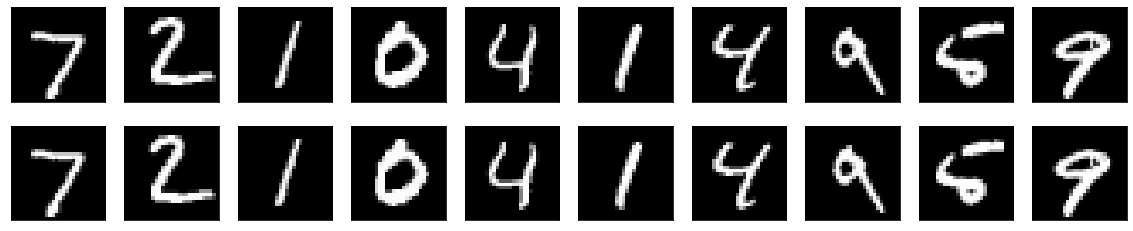

In [16]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize = (20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(X_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()  

본 내용은 2021/03/29(월)에 학습한 내용입니다.